In [3]:
# 04_decision_tree.ipynb

import joblib
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

artifacts = joblib.load("../Dataset/preprocessed_artifacts.pkl")

X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]
preprocessor = artifacts["preprocessor"]

# ---- Model ----
tree_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,  # you can tune later
)

clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", tree_clf),
    ]
)

clf.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Classification report:

              precision    recall  f1-score   support

        Good       0.66      0.66      0.66      3566
        Poor       0.70      0.71      0.71      5799
    Standard       0.75      0.75      0.75     10635

    accuracy                           0.72     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.72      0.72      0.72     20000



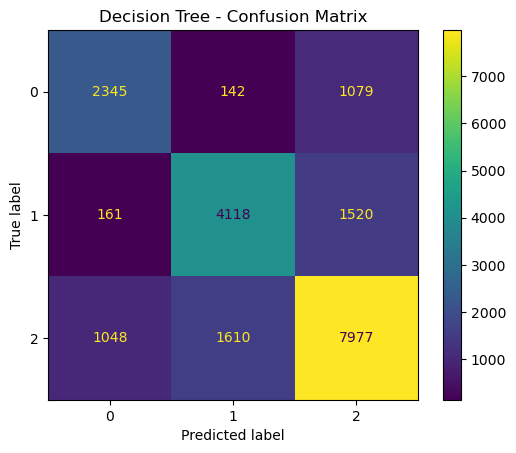

'Saved decision tree model'

In [4]:
# ---- Evaluation ----
y_pred = clf.predict(X_test)

print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

joblib.dump(clf, "../Dataset/model_decision_tree.pkl")
"Saved decision tree model"
